## Pac-Man UCS + Greedy Algo and Visualisation 

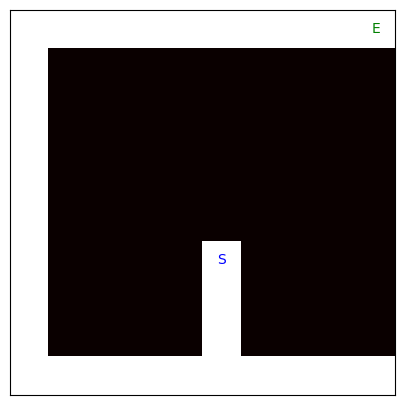

In [7]:
from queue import PriorityQueue
import matplotlib.pyplot as plt
import numpy as np

# Maze size and corners
maze_size = 10
corners = [(0, 0), (0, 9), (9, 0), (9, 9)]

# Initial state
initial_state = ((5, 5), frozenset())

# Actions: up, down, left, right
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def ucs_with_path():
    frontier = PriorityQueue()
    frontier.put((0, initial_state, None))  # (cost, state, parent)
    explored = {}
    parents = {}

    while not frontier.empty():
        cost, current_state, parent = frontier.get()
        position, visited_corners = current_state

        if len(visited_corners) == len(corners):
            # Reconstruct the path
            path = []
            while current_state in parents:
                path.append(position)
                current_state = parents[current_state]
                position = current_state[0]
            path.reverse()
            return path
        
        if current_state not in explored:
            explored[current_state] = cost
            for action in actions:
                new_position = (position[0] + action[0], position[1] + action[1])
                
                if 0 <= new_position[0] < maze_size and 0 <= new_position[1] < maze_size:
                    new_visited_corners = set(visited_corners)
                    if new_position in corners:
                        new_visited_corners.add(new_position)
                    new_state = (new_position, frozenset(new_visited_corners))
                    new_cost = cost + 1
                    if new_state not in explored or new_cost < explored[new_state]:
                        frontier.put((new_cost, new_state, current_state))
                        parents[new_state] = current_state  # Save parent

    return []


def visualize_path(path):
    maze = np.zeros((maze_size, maze_size))
    
    for x, y in corners:
        maze[x, y] = 0.5  # Mark corners
    
    for x, y in path:
        maze[x, y] = 1  # Mark path
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(maze, cmap='hot', interpolation='nearest')
    
    if path:
        ax.text(path[0][1], path[0][0], 'S', ha='center', va='center', color='blue')
        ax.text(path[-1][1], path[-1][0], 'E', ha='center', va='center', color='green')
    
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

# Run the UCS algorithm to find the path
ucs_path = ucs_with_path()

# Visualize the path found by UCS
visualize_path(ucs_path)


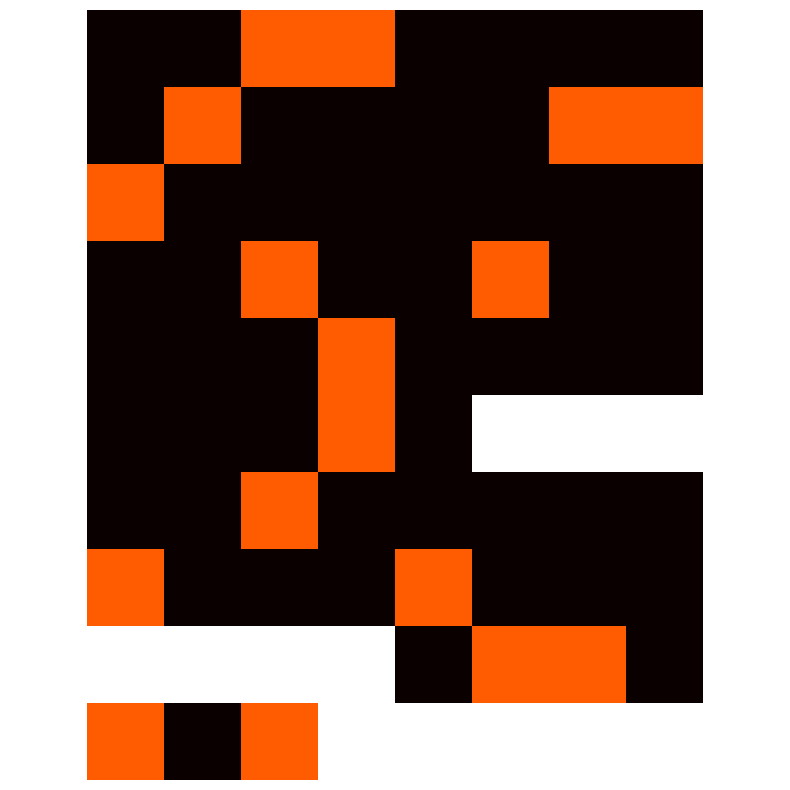

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue
import random

# Define the size of the maze
maze_size = 10

# Corners and initial position
corners = [(0, 0), (0, maze_size - 1), (maze_size - 1, 0), (maze_size - 1, maze_size - 1)]
initial_position = (maze_size // 2, maze_size // 2)  # Place Pac-Man in the center

# Directions Pac-Man can move
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Function to create a random maze layout
def create_random_maze(maze_size, density=0.2):
    maze = np.zeros((maze_size, maze_size), dtype=int)
    for i in range(maze_size):
        for j in range(maze_size):
            if random.random() < density and (i, j) not in corners and (i, j) != initial_position:
                maze[i][j] = 1
    return maze

# Check if a move is valid (inside maze bounds and not a wall)
def is_valid_move(maze, position):
    x, y = position
    if 0 <= x < maze_size and 0 <= y < maze_size and maze[x][y] == 0:
        return True
    return False

# UCS algorithm with walls
def ucs_with_path_and_walls(maze, start, goals):
    initial_state = (start, frozenset())
    frontier = PriorityQueue()
    frontier.put((0, initial_state))
    explored = set()
    parents = {}

    while not frontier.empty():
        cost, current_state = frontier.get()
        position, visited_corners = current_state

        if position in goals and len(visited_corners) == len(goals):
            path = []
            while current_state != (start, frozenset()):
                path.append(position)
                current_state = parents[current_state]
                position = current_state[0]
            return path[::-1]

        explored.add(current_state)

        for action in actions:
            new_position = (position[0] + action[0], position[1] + action[1])
            new_visited_corners = set(visited_corners)
            if new_position in goals:
                new_visited_corners.add(new_position)
            new_state = (new_position, frozenset(new_visited_corners))

            if new_state not in explored and is_valid_move(maze, new_position):
                frontier.put((cost + 1, new_state))
                parents[new_state] = current_state

    return []

# Visualization function
def visualize_maze_with_path(maze, path):
    maze_array = np.array(maze)
    for position in path:
        maze_array[position] = 2  # Mark the path in the maze
    plt.figure(figsize=(10, 10))
    plt.imshow(maze_array, cmap='hot', interpolation='nearest')
    plt.axis('off')
    plt.show()

# Generate a random maze until we get a solvable one
while True:
    random_maze = create_random_maze(maze_size)
    path = ucs_with_path_and_walls(random_maze, initial_position, corners)
    if path:
        break  # We found a solvable maze

# Visualize the maze with the UCS path
visualize_maze_with_path(random_maze, path)


In [13]:
# Define walls in the maze, using 1 to represent a wall
# This is an example layout. Modify it according to your maze's structure
maze_layout = [
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
    [0, 1, 0, 1, 1, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
]

# Function to check if a move hits a wall
def hit_wall(position):
    x, y = position
    return maze_layout[x][y] == 1

# Modify the `ucs_with_path` to check for walls
def ucs_with_path():
    frontier = PriorityQueue()
    frontier.put((0, initial_state, None))
    explored = set()
    
    while not frontier.empty():
        cost, current_state, parent = frontier.get()
        position, visited_corners = current_state
        
        if current_state in explored:
            continue
        
        explored.add(current_state)
        
        if len(visited_corners) == len(corners):
            # Reconstruct the path
            path = [position]
            while parent:
                position, parent = parent
                path.append(position)
            path.reverse()
            return path
        
        for action in actions:
            new_position = (position[0] + action[0], position[1] + action[1])
            
            if 0 <= new_position[0] < maze_size and 0 <= new_position[1] < maze_size and not hit_wall(new_position):
                new_visited_corners = set(visited_corners)
                if new_position in corners:
                    new_visited_corners.add(new_position)
                new_state = (new_position, frozenset(new_visited_corners))
                new_cost = cost + 1
                frontier.put((new_cost, new_state, (position, parent)))

    return []

# Modify the `visualize_path` to display walls
def visualize_path(path):
    maze = np.array(maze_layout)  # Use the maze layout
    fig, ax = plt.subplots(figsize=(5, 5))
    
    # Set up the display
    for x, y in corners:
        maze[x][y] = 0.5  # Mark corners with a different value
    
    for x, y in path:
        maze[x][y] = 2  # Mark path with a different value
    
    ax.imshow(maze, cmap='hot', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Start and end labels
    if path:
        ax.text(path[0][1], path[0][0], 'S', ha='center', va='center', color='blue')
        ax.text(path[-1][1], path[-1][0], 'E', ha='center', va='center', color='green')
    
    plt.show()


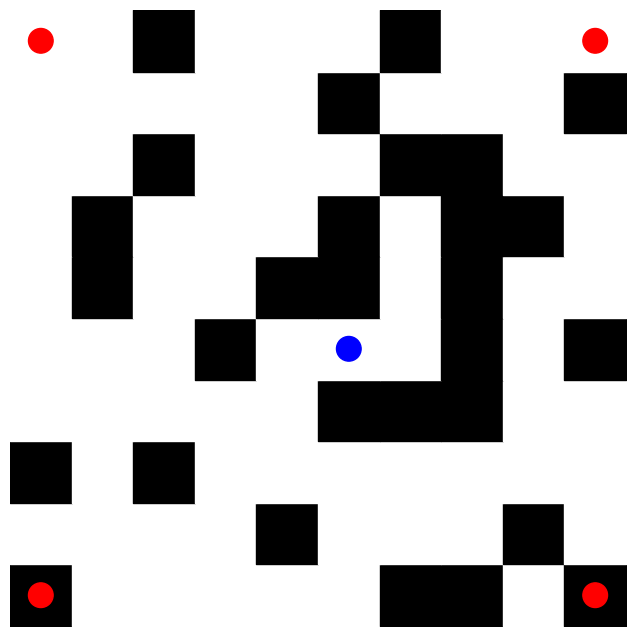

In [14]:
from queue import PriorityQueue
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the size of the maze
maze_size = 10

# Randomly generate walls for the maze
def create_random_maze(maze_size, wall_probability=0.3):
    maze = np.zeros((maze_size, maze_size))
    for i in range(maze_size):
        for j in range(maze_size):
            if random.random() < wall_probability:
                maze[i][j] = 1  # Wall
    return maze

# Initialize a random maze with walls
random_maze = create_random_maze(maze_size)

# Define the corners and initial state in the maze
corners = [(0, 0), (0, maze_size - 1), (maze_size - 1, 0), (maze_size - 1, maze_size - 1)]
initial_state = ((5, 5), frozenset(corners))  # Start in the middle with all corners unvisited

# Actions Pac-Man can take
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

# Check if a move is within the maze and not hitting a wall
def is_valid_move(maze, position):
    x, y = position
    if 0 <= x < maze_size and 0 <= y < maze_size and maze[x][y] == 0:
        return True
    return False

# UCS algorithm to find the path
def ucs_with_path(maze, initial_state, corners):
    frontier = PriorityQueue()
    frontier.put((0, initial_state, []))  # (cost, state, path)
    explored = set()

    while not frontier.empty():
        cost, (position, visited_corners), path = frontier.get()

        if position in explored:
            continue
        explored.add(position)

        # Check if we've visited all corners
        if not visited_corners:
            return path + [position]

        for action in actions:
            new_position = (position[0] + action[0], position[1] + action[1])
            if is_valid_move(maze, new_position):
                new_corners = visited_corners - {new_position} if new_position in visited_corners else visited_corners
                new_cost = cost + 1
                new_path = path + [position]
                frontier.put((new_cost, (new_position, new_corners), new_path))

    return []  # Return an empty path if no path is found

# Visualization function
def visualize_path(maze, path):
    fig, ax = plt.subplots(figsize=(8, 8))
    # Draw the maze
    for i in range(maze_size):
        for j in range(maze_size):
            if maze[i][j] == 1:
                ax.fill_between([j, j+1], i, i+1, color='black')
            else:
                ax.fill_between([j, j+1], i, i+1, color='white')

    # Draw the path
    for position in path:
        y, x = position
        ax.add_artist(plt.Circle((x+0.5, maze_size-y-0.5), 0.2, color='lime'))

    # Draw the corners
    for corner in corners:
        y, x = corner
        ax.add_artist(plt.Circle((x+0.5, maze_size-y-0.5), 0.2, color='red'))

    # Draw the start
    y, x = initial_state[0]
    ax.add_artist(plt.Circle((x+0.5, maze_size-y-0.5), 0.2, color='blue'))

    # Set the limits and aspect
    ax.set_xlim(0, maze_size)
    ax.set_ylim(0, maze_size)
    ax.set_aspect('equal')

    # Turn off the axis labels
    ax.axis('off')

    plt.show()

# Run the UCS algorithm to find the path
path = ucs_with_path(random_maze, initial_state, set(corners))

# Visualize the path found by UCS
visualize_path(random_maze, path)


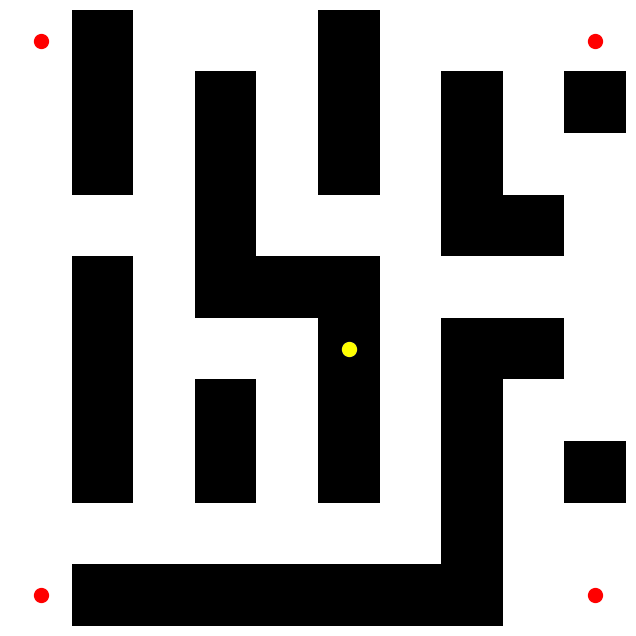

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue

# Define a simple 10x10 maze with 0 as empty space and 1 as walls
# Example maze (You can design your own maze layout with 1's representing walls)
maze_layout = np.array([
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
    [0, 1, 0, 1, 1, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
])

# Define corners and initial state
maze_size = 10
initial_state = ((5, 5), frozenset(corners))
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
corners = [(0, 0), (0, 9), (9, 0), (9, 9)]

# Check if a position is a wall in the maze
def is_wall(position):
    x, y = position
    return maze_layout[x, y] == 1

# UCS algorithm with wall avoidance
def ucs_with_path_and_walls():
    frontier = PriorityQueue()
    frontier.put((0, initial_state, []))  # (cost, state, path)
    explored = set()
    
    while not frontier.empty():
        cost, (position, visited_corners), path = frontier.get()

        if position in explored:
            continue
        explored.add(position)

        if len(visited_corners) == len(corners):
            return path + [position]
        
        for action in actions:
            new_position = (position[0] + action[0], position[1] + action[1])
            if 0 <= new_position[0] < maze_size and 0 <= new_position[1] < maze_size and not is_wall(new_position):
                new_visited_corners = set(visited_corners)
                if new_position in corners:
                    new_visited_corners.add(new_position)
                frontier.put((cost + 1, (new_position, frozenset(new_visited_corners)), path + [position]))
    
    return []

# Visualization function
def visualize_path(path):
    plt.figure(figsize=(8, 8))
    plt.imshow(maze_layout, cmap='Greys', interpolation='nearest')
    for (x, y) in path:
        plt.scatter(y, x, c='blue', s=100)  # Path positions marked in blue
    plt.scatter(initial_state[0][1], initial_state[0][0], c='yellow', s=100)  # Start position marked in yellow
    for (x, y) in corners:
        plt.scatter(y, x, c='red', s=100)  # Corner positions marked in red
    plt.axis('off')
    plt.show()

# Run the UCS algorithm to find the path
ucs_path = ucs_with_path_and_walls()

# Visualize the path found by UCS
visualize_path(ucs_path)


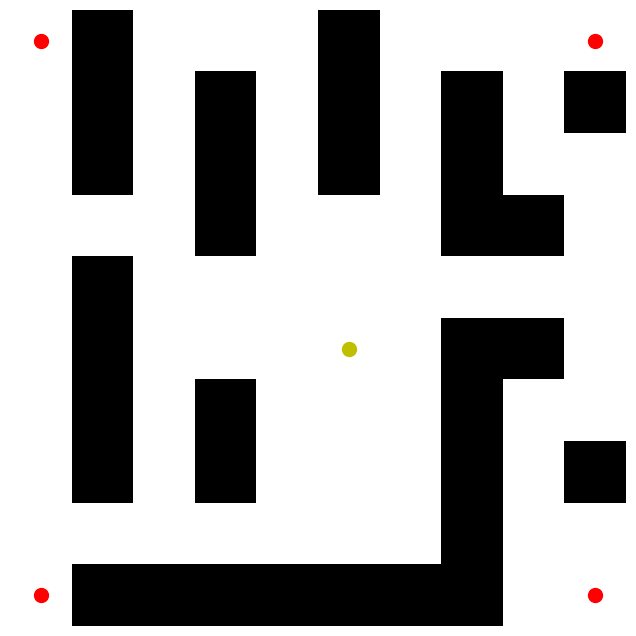

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue

# Define a simple 10x10 maze with 0 as empty space and 1 as walls
# Example maze (You can design your own maze layout with 1's representing walls)
maze_layout = np.array([
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
])

# Define corners and initial state
maze_size = 10
initial_state = ((5, 5), frozenset(corners))
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
corners = [(0, 0), (0, 9), (9, 0), (9, 9)]

def is_wall(maze_layout, position):
    x, y = position
    # Ensure x and y are within the bounds of the maze to avoid index errors
    if 0 <= x < len(maze_layout) and 0 <= y < len(maze_layout[0]):
        return maze_layout[x, y] == 1
    return False  # Treat out-of-bounds positions as walls


def ucs_with_path_and_walls(maze_layout, initial_position, corners):
    frontier = PriorityQueue()
    start_state = (initial_position, frozenset([initial_position]))
    frontier.put((0, start_state, [initial_position]))  # (cost, state, path)
    explored = set()

    while not frontier.empty():
        cost, (position, visited_corners), path = frontier.get()

        if (position, visited_corners) in explored:
            continue
        explored.add((position, visited_corners))

        if visited_corners == frozenset(corners):
            return path

        for action in actions:
            new_position = (position[0] + action[0], position[1] + action[1])
            if 0 <= new_position[0] < maze_size and 0 <= new_position[1] < maze_size and not is_wall(maze_layout, new_position):
                new_visited_corners = visited_corners | {new_position} if new_position in corners else visited_corners
                new_state = (new_position, new_visited_corners)
                if new_state not in explored:
                    new_path = path + [new_position]
                    frontier.put((cost + 1, new_state, new_path))

    return []  # If no path found



def visualize_path(maze_layout, path, corners, initial_position):
    fig, ax = plt.subplots(figsize=(8, 8))
    # Convert maze layout to an image where walls are black and paths are white
    maze_image = np.ones((maze_size, maze_size)) - maze_layout
    
    ax.imshow(maze_image, cmap='gray')

    # Convert path to X and Y coordinates for plotting
    if path:
        y, x = zip(*path)
        ax.plot(x, y, 'y-', linewidth=2)  # Path in yellow

    # Highlight the initial position and corners
    ax.plot(initial_position[1], initial_position[0], 'yo', markersize=10)  # Start in yellow
    for corner in corners:
        ax.plot(corner[1], corner[0], 'ro', markersize=10)  # Corners in red

    # Turn off the axis labels
    plt.axis('off')
    plt.show()

# Define the maze size, initial position, and corner locations
maze_size = 10
initial_position = (5, 5)  # Make sure the starting position is not a wall
corners = [(0, 0), (0, 9), (9, 0), (9, 9)]


# Run the UCS algorithm to find the path
ucs_path = ucs_with_path_and_walls(maze_layout, initial_position, corners)

# Now visualize the path
visualize_path(maze_layout, ucs_path, corners, initial_position)
